# 📝 Exercise M1.01

Imagine we are interested in predicting penguins species based on two of their
body measurements: culmen length and culmen depth. First we want to do some
data exploration to get a feel for the data.

What are the features? What is the target?

The data is located in `../datasets/penguins_classification.csv`, load it with
`pandas` into a `DataFrame`.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = pd.read_csv("../datasets/penguins_classification.csv")

Show a few samples of the data.

How many features are numerical? How many features are categorical?

In [4]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [11]:
target_column = 'Species'

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Culmen Length (mm)  342 non-null    float64
 1   Culmen Depth (mm)   342 non-null    float64
 2   Species             342 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [9]:
numeric_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']

# o dataset não possui features categóricas, somente númericas
# o target dele é categórico, pois trata-se de uma string (classe)

penguins[numeric_columns]

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6
...,...,...
337,55.8,19.8
338,43.5,18.1
339,49.6,18.2
340,50.8,19.0


In [12]:
penguins[target_column]

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
337    Chinstrap
338    Chinstrap
339    Chinstrap
340    Chinstrap
341    Chinstrap
Name: Species, Length: 342, dtype: object

What are the different penguins species available in the dataset and how many
samples of each species are there? Hint: select the right column and use the
[`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
method.

In [13]:
penguins[target_column].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

Plot histograms for the numerical features

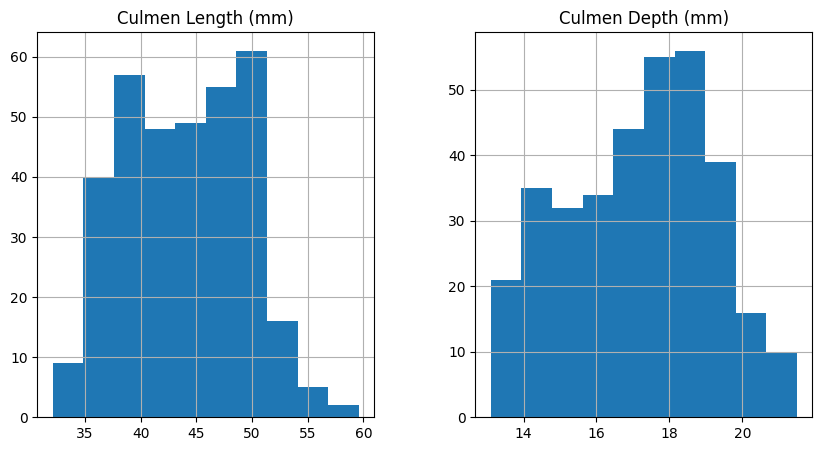

In [16]:
_ = penguins[numeric_columns].hist(figsize=(10, 5))

Show features distribution for each class. Hint: use
[`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

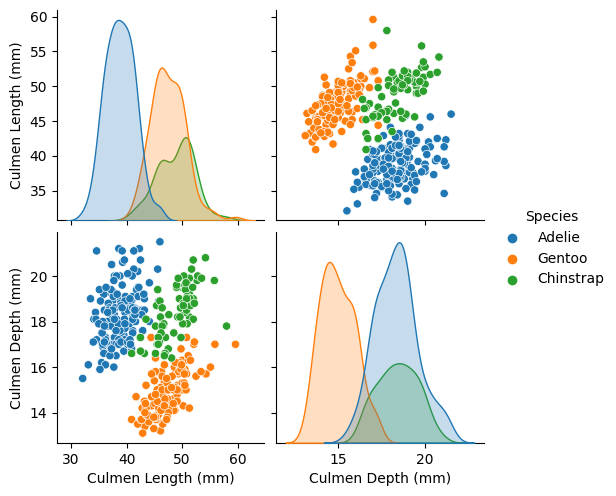

In [20]:
_ = sns.pairplot(
    data=penguins,
    hue=target_column,
    vars=numeric_columns,
)

Looking at these distributions, how hard do you think it will be to classify
the penguins only using `"culmen depth"` and `"culmen length"`?

Tradução -> Olhando para essas distribuições, quão difícil você acha que será classificar
os pinguins usando apenas `"profundidade do culmen"` e `"comprimento do culmen"`?

Creio que não será difícil, pois os valores de cada classe estão separados entre si e agrupados. Desta forma será possível separar tranquilamente os dados de acordo com essas duas features. Conforme mostrado a seguir:

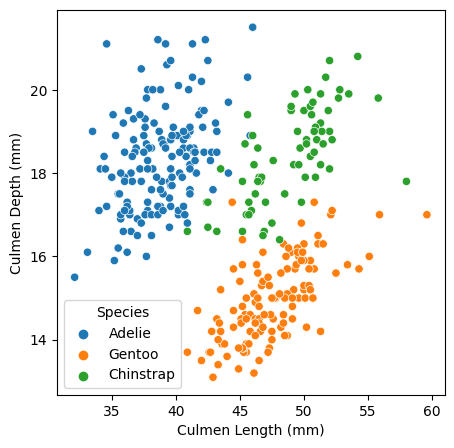

In [26]:
plt.subplots(figsize=(5, 5))

_ = sns.scatterplot(
    data=penguins,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    hue=target_column
)

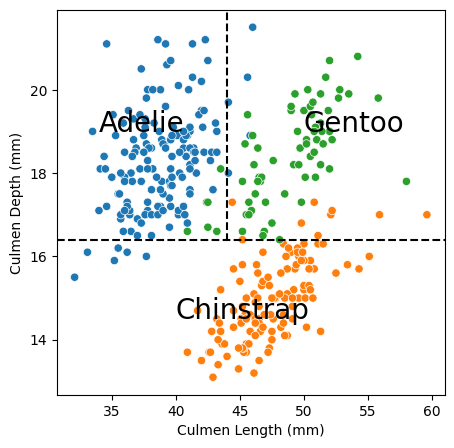

In [53]:
plt.subplots(figsize=(5, 5))

_ = sns.scatterplot(
    data=penguins,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    hue=target_column,
    legend=None
)

culmen_length = 44
plt.axvline(x=culmen_length, ymin=0.4, ymax=1, color='black', linestyle='--')
# culmen_length -> determina onde vai ser o corte em x
# ymin -> em que altura de y vai começar o corte
# ymax -> até onde vai

culmen_depth = 16.4
plt.axhline(y=culmen_depth, xmin=0, xmax=1, color='black', linestyle='--')


plt.annotate("Adelie", xy=(34, 19), fontsize=20)
plt.annotate("Gentoo", xy=(50, 19), fontsize=20)
_ = plt.annotate("Chinstrap", (40, 14.5), fontsize=20)

Desta forma já poderíamos ter uma classificação, somente utilizando os limites encontrados visualmente entre os dados.